In [273]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Второй проект задание 2

К вам поступила информация о числе заказов за прошедшие 3 месяца с разрешением по неделям.   
Постройте (если это возможно) прогноз продаж на следующие 3 месяца, с учётом того, что в неделю с 2020-02-02 по 2020-02-09 была проведена массивная акция, повысившая число заказов на 7%.

In [274]:
orders = pd.read_csv('https://stepik.org/media/attachments/lesson/426638/test2_completed.csv', sep=',')

In [275]:
orders

,Дата,Число заказов
0,2020-01-05,650
1,2020-01-12,837
2,2020-01-19,1020
3,2020-01-26,1176
4,2020-02-02,1489
5,2020-02-09,1823
6,2020-02-16,1991
7,2020-02-23,2166
8,2020-03-01,2334
9,2020-03-08,2607


In [276]:
orders = orders.rename(columns={'Дата':'date', 'Число заказов': 'numbers_orders'})

In [277]:
orders.dtypes

date              object
numbers_orders     int64
dtype: object

In [278]:
orders['date'] = pd.to_datetime(orders.date)

In [279]:
orders.head()

,date,numbers_orders
0,2020-01-05,650
1,2020-01-12,837
2,2020-01-19,1020
3,2020-01-26,1176
4,2020-02-02,1489


(array([737425., 737439., 737456., 737470., 737485., 737499., 737516.]),
 <a list of 7 Text major ticklabel objects>)

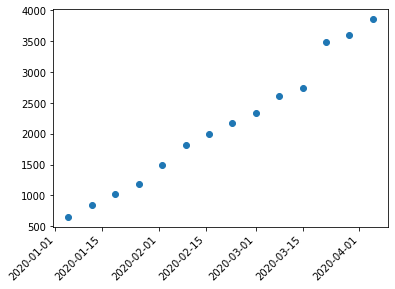

In [280]:
plt.scatter('date','numbers_orders', data=orders)
plt.xticks(rotation=45, ha='right')

In [281]:
# Переводим время в секунды, чтобы удобнее было считать
orders['ts'] = orders[['date']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
orders.head()

,date,numbers_orders,ts
0,2020-01-05,650,1578182400
1,2020-01-12,837,1578787200
2,2020-01-19,1020,1579392000
3,2020-01-26,1176,1579996800
4,2020-02-02,1489,1580601600


-------------------------------------------------------------------------

Прочитав, что чем меньше данных в датафрейме, тем модель для построения предсказываемых значений должна быть проще, поэтому решила воспользоваться моделью линейной регрессии для построения прогноза продаж.

Для построения будем использовать библиотеку sckit-learn.

Для построения прогноза продаж пользовалась этой статьей https://proglib.io/p/linear-regression

---------------------------------------------------

In [282]:
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [283]:
# Определим даты, на которые нам будем предсказать продажи
x_prognosts = ['2020-04-12','2020-04-19','2020-04-26','2020-05-03','2020-05-10','2020-05-17','2020-05-24',
      '2020-05-31','2020-06-07','2020-06-14','2020-06-21','2020-06-28','2020-07-05']

In [284]:
# Переводим даты в TimeStamp
x_prognosts = [int(datetime.strptime(i, '%Y-%m-%d').strftime("%s")) for i in x_prognosts]

In [285]:
x_prognosts

[1586642400,
 1587247200,
 1587852000,
 1588456800,
 1589061600,
 1589666400,
 1590271200,
 1590876000,
 1591480800,
 1592085600,
 1592690400,
 1593295200,
 1593900000]

In [286]:
# Изменяем у дат shape данных
x_prognosts = np.array(x_prognosts).reshape(13,1)
print(x_prognosts)

[[1586642400]
 [1587247200]
 [1587852000]
 [1588456800]
 [1589061600]
 [1589666400]
 [1590271200]
 [1590876000]
 [1591480800]
 [1592085600]
 [1592690400]
 [1593295200]
 [1593900000]]


In [287]:
# Создаем numpy arrays для x (independent) and y (dependent)  
y = orders.numbers_orders.values.reshape(-1,1)
x = orders.ts.values.reshape(-1,1)

In [288]:
# Вызываем модель регрессии
model = LinearRegression().fit(x, y)

In [289]:
# Предсказываем 
y_predicted = model.predict(x)
y_predicted_new = model.predict(x_prognosts)

Slope: [[0.00040927]]
Intercept: [-645381.00973312]
Root mean squared error:  17678.15416012437
R2 score:  0.9825538022955228


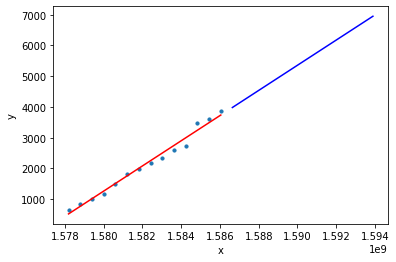

In [290]:
# Проверяем модель
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

print('Slope:' , model.coef_)
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.plot(x_prognosts, y_predicted_new, color='b')
plt.show()

---------------------------------------------------------

### Итого:  

Мы видим, что у полученных предсказанных значениях высокий **R2-score 98% R²** и он объясняет, насколько мы можем доверять этой модели (т.е. вариативность данных).

---------------------------------------------------------

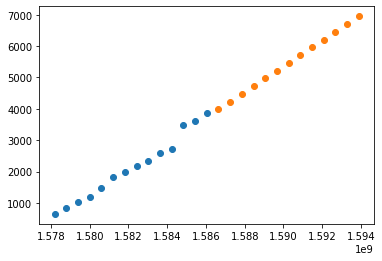

In [291]:
plt.scatter(x,y)
plt.scatter(x_prognosts,y_predicted_new)

In [292]:
# Построим график, чтобы по оси х были даты
tss = x_prognosts.flatten().tolist()
date_new = pd.Series(tss).apply(datetime.fromtimestamp)
print(date_new)

0    2020-04-12
1    2020-04-19
2    2020-04-26
3    2020-05-03
4    2020-05-10
5    2020-05-17
6    2020-05-24
7    2020-05-31
8    2020-06-07
9    2020-06-14
10   2020-06-21
11   2020-06-28
12   2020-07-05
dtype: datetime64[ns]


In [293]:
y_predicted_new_orders_new =  pd.Series(y_predicted_new.flatten().tolist())

In [294]:
d = {'date_new': date_new, 'numbers_orders_new': y_predicted_new_orders_new}
orders_new = pd.DataFrame(data=d)

In [295]:
orders_new.head()

,date_new,numbers_orders_new
0,2020-04-12,3980.921402
1,2020-04-19,4228.446677
2,2020-04-26,4475.971952
3,2020-05-03,4723.497227
4,2020-05-10,4971.022501


(array([737425., 737456., 737485., 737516., 737546., 737577., 737607.]),
 <a list of 7 Text major ticklabel objects>)

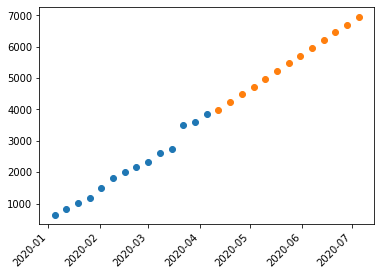

In [296]:
plt.scatter('date','numbers_orders', data=orders)
plt.scatter('date_new','numbers_orders_new', data=orders_new)
plt.xticks(rotation=45, ha='right')

#### Учет акции:

Теперь давайте проделаем все тоже самое, только с учетом проведения акции в неделю с 2020-02-02 по 2020-02-09 была проведена массивная акция, повысившая число заказов на 7%.

In [297]:
orders7 = orders
orders7

,date,numbers_orders,ts
0,2020-01-05,650,1578182400
1,2020-01-12,837,1578787200
2,2020-01-19,1020,1579392000
3,2020-01-26,1176,1579996800
4,2020-02-02,1489,1580601600
5,2020-02-09,1823,1581206400
6,2020-02-16,1991,1581811200
7,2020-02-23,2166,1582416000
8,2020-03-01,2334,1583020800
9,2020-03-08,2607,1583625600


In [298]:
# Учли повышение на 7% на недели с 2020-02-02 по 2020-02-09
orders7.loc[4, 'numbers_orders'] = round(orders.loc[4].numbers_orders*100/107)

In [299]:
x_prognosts7 = ['2020-04-12','2020-04-19','2020-04-26','2020-05-03','2020-05-10','2020-05-17','2020-05-24',
      '2020-05-31','2020-06-07','2020-06-14','2020-06-21','2020-06-28','2020-07-05']

In [300]:
x_prognosts7 = [int(datetime.strptime(i, '%Y-%m-%d').strftime("%s")) for i in x_prognosts7]

In [301]:
x_prognosts7 = np.array(x_prognosts7).reshape(13,1)
print(x_prognosts7)

[[1586642400]
 [1587247200]
 [1587852000]
 [1588456800]
 [1589061600]
 [1589666400]
 [1590271200]
 [1590876000]
 [1591480800]
 [1592085600]
 [1592690400]
 [1593295200]
 [1593900000]]


In [302]:
# Создаем numpy arrays для x (independent) and y (dependent)  
y7 = orders7.numbers_orders.values.reshape(-1,1)
x7 = orders7.ts.values.reshape(-1,1)

In [303]:
model7 = LinearRegression().fit(x7, y7)

In [304]:
# Предсказываем 
y_predicted7 = model7.predict(x7)
y_predicted_new7 = model7.predict(x_prognosts7)

Slope: [[0.00041103]]
Intercept: [-648176.34568289]
Root mean squared error:  18555.57017268395
R2 score:  0.9818574697973326


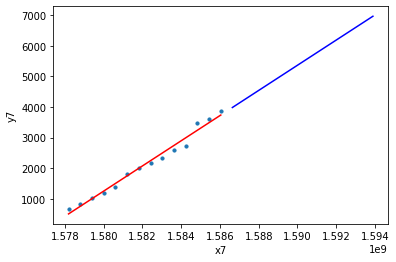

In [305]:
rmse7 = mean_squared_error(y7, y_predicted7)
r27 = r2_score(y7, y_predicted7)

print('Slope:' , model7.coef_)
print('Intercept:', model7.intercept_)
print('Root mean squared error: ', rmse7)
print('R2 score: ', r27)

plt.scatter(x7, y7, s=10)
plt.xlabel('x7')
plt.ylabel('y7')

# predicted values
plt.plot(x7, y_predicted7, color='r')
plt.plot(x_prognosts7, y_predicted_new7, color='b')
plt.show()